In [1]:
# install minisom from jupyter notebook cell
# !pip install minisom

# OR 
# install from Terminal/Anaconda Prompt 
# (Don't forget to restart Anaconda Navigator)
# pip install minisom


# Source and documentation:
# https://github.com/JustGlowing/minisom/

In [2]:
from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

from minisom import MiniSom

In [3]:
## Import Matplotlib functions to create MiniSOM visualizations

from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib import colors as mpl_colors

from matplotlib.lines import Line2D
import seaborn as sns

from matplotlib import __version__ as mplver

In [4]:
## Recommended version at least 3.7.0 or greater
print("matplotlib version is:" , mplver)

matplotlib version is: 3.7.2


## Import preprocessed data

In [5]:
df = pd.read_csv(join('..', 'data', 'tugas_preprocessed.csv'))

In [6]:
df.head()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x_status_Widow,x_gender_M,x_dependents_1.0,x_description_Kind of OK,x_description_Meh...,x_description_OK nice!,x_description_Take my money!!,PC0,PC1,PC2
0,0.743162,1.191605,0.457819,-0.617023,-0.243065,1.216847,0.495837,-0.499274,-1.257560,0.522055,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,1.937697,-1.120781
1,1.559488,1.100011,-1.535723,0.166160,-0.790228,0.740464,-0.374374,-0.631907,-1.798649,-0.237578,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,1.421498,-0.785625
2,-1.548542,-0.823463,0.557496,-0.834573,1.672006,-0.371096,-0.809480,2.286023,0.906799,-0.904191,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,-0.381440,0.780867
3,0.845528,0.550447,-1.402820,0.383710,0.440889,-0.768082,-0.084304,-0.234007,-0.391816,0.785568,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,0.514177,1.302203
4,0.782435,1.008417,-0.871209,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,-0.445925,1.237135,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,0.704805,0.443376


In [7]:
df.columns

Index(['income', 'frq', 'rcn', 'clothes', 'kitchen', 'small_appliances',
       'toys', 'house_keeping', 'per_net_purchase', 'spent_online',
       'x_education_2nd Cycle', 'x_education_Graduation', 'x_education_Master',
       'x_education_PhD', 'x_status_Married', 'x_status_Single',
       'x_status_Together', 'x_status_Widow', 'x_gender_M', 'x_dependents_1.0',
       'x_description_Kind of OK', 'x_description_Meh...',
       'x_description_OK nice!', 'x_description_Take my money!!', 'PC0', 'PC1',
       'PC2'],
      dtype='object')

In [8]:
# Splitting feature names into groups
non_metric_features = df.columns[df.columns.str.startswith('x')]
pc_features = df.columns[df.columns.str.startswith('PC')]
metric_features = df.columns[~df.columns.str.startswith('x') & ~df.columns.str.startswith('PC')]

## Self-organizing maps
What is a SOM? How does it work? What is it used for?

The SOM objective is to adjust the units to the data in the input space, so that the
network is (as best as possible) representative of the training dataset.

### How is it computed?
### Important concepts:
- Units and observations
- BMU
- Neighborhood function
- Input and Output space

**Video:**

(May be a good idea to mute the video before playing)

https://www.youtube.com/watch?v=k7DK5fnJH94


### Characteristics:
- Grid shape needs to be set a priori
- Results depend on the initialization (even tough it can be quite robust to it)
- Fitting a SOM can be computationally expensive
- Capable of finding the global optimum (theoretically - if the LR -> 0)
- Visualization tool for high-dimensional data

### Additional analyses/tutorials
- [Air Flights](https://github.com/sevamoo/SOMPY/blob/master/sompy/examples/AirFlights_hexagonal_grid.ipynb)
- [Visualizations on toy datasets](https://gist.github.com/sevamoo/035c56e7428318dd3065013625f12a11)

### How to apply Self-Organizing Maps?

The training of a SOM is **more effective** if it is done in two phases: the unfolding phase, and the fine-tuning phase. 

In the **unfolding phase** the objective is to **spread the units** in the region of the input space where the data patterns are located. In this phase the neighbourhood function should have a large initial radius so that all units have high mobility and the map can quickly cover the input space.

The **fine tuning phase**, as the name implies, is the process of small adjustments in order to **reduce the quantization error**, and centre the units in the areas where the density of patterns is highest. Usually, in this phase the learning rate and the neighbourhood radius are smaller than the ones used in the unfolding phase. As these two parameters are smaller, the map will need more time to adjust its weights and that is why the number of iterations or epochs is normally higher.

**Exercise**
- Train a SOM with a 10x10 grid, random initialization, gaussian neighborhood function and hexagonal topology/lattice
- Set an unfolding phase and a fine tuning phase of 100 iterations

In [9]:
M = 10
N = 10

sm = MiniSom(M, N, # 10x10 map size
             len(metric_features), # Number of the elements of the vectors in input.
             learning_rate=.7, 
             activation_distance='euclidean',
             topology='hexagonal', 
             neighborhood_function='gaussian', 
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(df[metric_features].values) 
print(np.round(sm.quantization_error(df[metric_features].values),4),"Starting QE")


# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;
sm.train_batch(df[metric_features].values, 2000)
print(np.round(sm.quantization_error(df[metric_features].values),4),"Ending QE")


1.5345 Starting QE
1.3286 Ending QE


/opt/homebrew/Caskroom/miniforge/base/envs/DM2324/lib/python3.11/site-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


## Visualizing data with SOMs

Improving the visualizations produced by SOMPY is not a straightforward process.

If you run into any issues with the SOMPY library that you are not able to fix even after searching on Google, you can instead use the [MiniSOM library](https://github.com/JustGlowing/minisom). It does not come with its own visualizations, but there are examples in the minisom version of the notebooks.


### Component planes
What do they represent? What kinds of information do they contain?

Analyse these plots from the following perspectives:
- Feature importance
- Feature correlation (both globally and locally)
- Data distribution
- Outlier detection

In [10]:
##################################
## Visualizing Component Planes ##
##################################

def plot_component_planes(som,
                          figsize=(20,20),
                          features=None,
                          figrows=3,
                          title="SOM Visualization",
                          cmap=cm.Blues
                         ):

    xx, yy = som.get_euclidean_coordinates()
    weights = som.get_weights()
    

    fig = plt.figure(figsize=figsize, constrained_layout=False)
    subfigs = fig.subfigures(figrows, 
                             int(np.ceil(len(features)/figrows)), 
                             wspace=.05)
    


    for cpi, sf in zip(range(len(metric_features)), subfigs.flatten()):
        
        colornorm = mpl_colors.Normalize(vmin=np.min(weights[::,cpi]), 
                                             vmax=np.max(weights[::,cpi]))

        axs = sf.subplots(1,1)
        axs.set_aspect('equal')
        axs.set_title(features[cpi], y=0.95)

        for i in range(weights.shape[0]):
            for j in range(weights.shape[1]):
                wy = yy[(i, j)] * np.sqrt(3) / 2
                hexagon = RegularPolygon((xx[(i, j)], wy), 
                                     numVertices=6, 
                                     radius=.99 / np.sqrt(3),
                                     facecolor=cmap(colornorm(weights[i, j, cpi])), 
                                     alpha=1, 
                                     edgecolor=cmap(colornorm(weights[i, j, cpi]))
                                    )
                axs.add_patch(hexagon)

        ## Remove axes for hex plot
        axs.margins(.05)
        axs.axis("off")

        ## Add colorbar
        divider = make_axes_locatable(axs)

        ax_cb = divider.append_axes("right", size="7%")

        ## Create a Mappable object
        cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
        cmap_sm.set_array([])

        ## Create custom colorbar 
        cb1 = colorbar.Colorbar(ax_cb,
                                orientation='vertical', 
                                alpha=1,
                                mappable=cmap_sm
                                )
        cb1.ax.get_yaxis().labelpad = 6

        ## Add colorbar to plot
        sf.add_axes(ax_cb)

    fig.suptitle(title, fontsize='xx-large', y=1.05)

    plt.show()


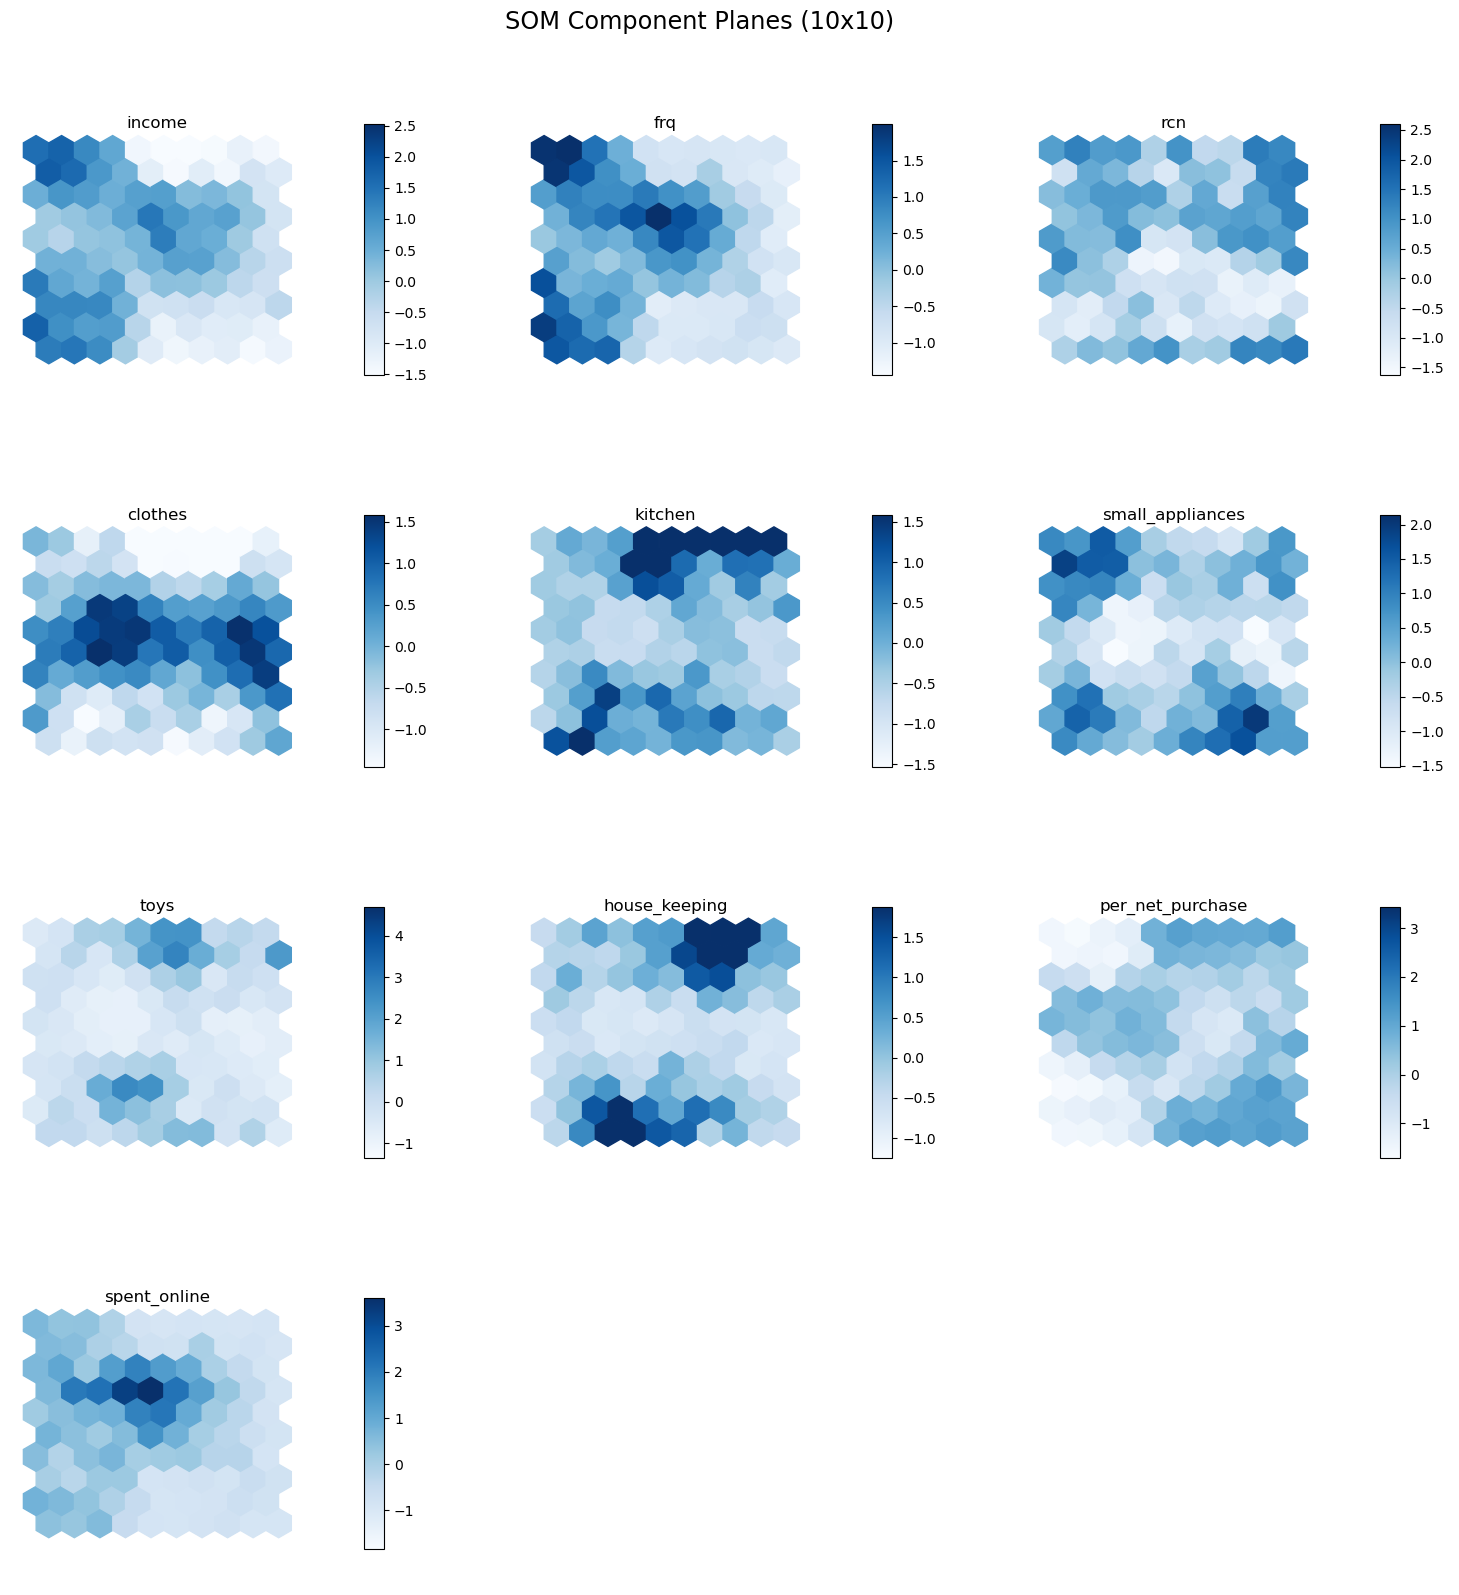

In [11]:
## Plot Component Planes
plot_component_planes(sm,
                      features=metric_features,
                      figsize=(15,15),
                      figrows=4,
                      title="SOM Component Planes ({}x{})".format(M,N)
                      
                     )




## U-matrix
Encode each neuron in the output space with the **average distance** to its neighbors in the input space.

Analyse these plots from the following perspectives:
- Clusters of units
- Potential outliers (units which are very distant from its neighbors and have low frequency)

In [12]:
def plot_som_hexagons(som,
                      matrix,
                      cmap=cm.Blues,
                      figsize=(20,20),
                      annotate=True,
                      title="SOM Matrix",
                      cbar_label="Color Scale"
                ):

    xx, yy = som.get_euclidean_coordinates()

    f = plt.figure(figsize=figsize)
    ax = f.add_subplot(111)

    ax.set_aspect('equal')
    ax.set_title(title, fontsize=20)

    colornorm = mpl_colors.Normalize(vmin=np.min(matrix), 
                                     vmax=np.max(matrix))

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            wy = yy[(i, j)] * np.sqrt(3) / 2
            hexagon = RegularPolygon((xx[(i, j)], wy), 
                                 numVertices=6, 
                                 radius=.95 / np.sqrt(3),
                                 facecolor=cmap(colornorm(matrix[i, j])), 
                                 alpha=1)
            ax.add_patch(hexagon)

            if annotate:
                annot_vals = np.round(matrix[i, j],2)
                if annot_vals > 1:
                    annot_vals = int(annot_vals)
                
                ax.text(xx[(i, j)], wy, annot_vals, 
                        ha='center', va='center', 
                        fontsize=figsize[1], 
                        )

    ax.margins(.05)
    ax.axis("off")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])
    
    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="2%", pad=0)    
    cb1 = colorbar.ColorbarBase(ax_cb, 
                                orientation='vertical', 
                                alpha=1,
                                mappable=cmap_sm
                               )
    cb1.ax.get_yaxis().labelpad = 16
    cb1.ax.set_ylabel(cbar_label, fontsize=18)
    plt.gcf().add_axes(ax_cb)

    return plt




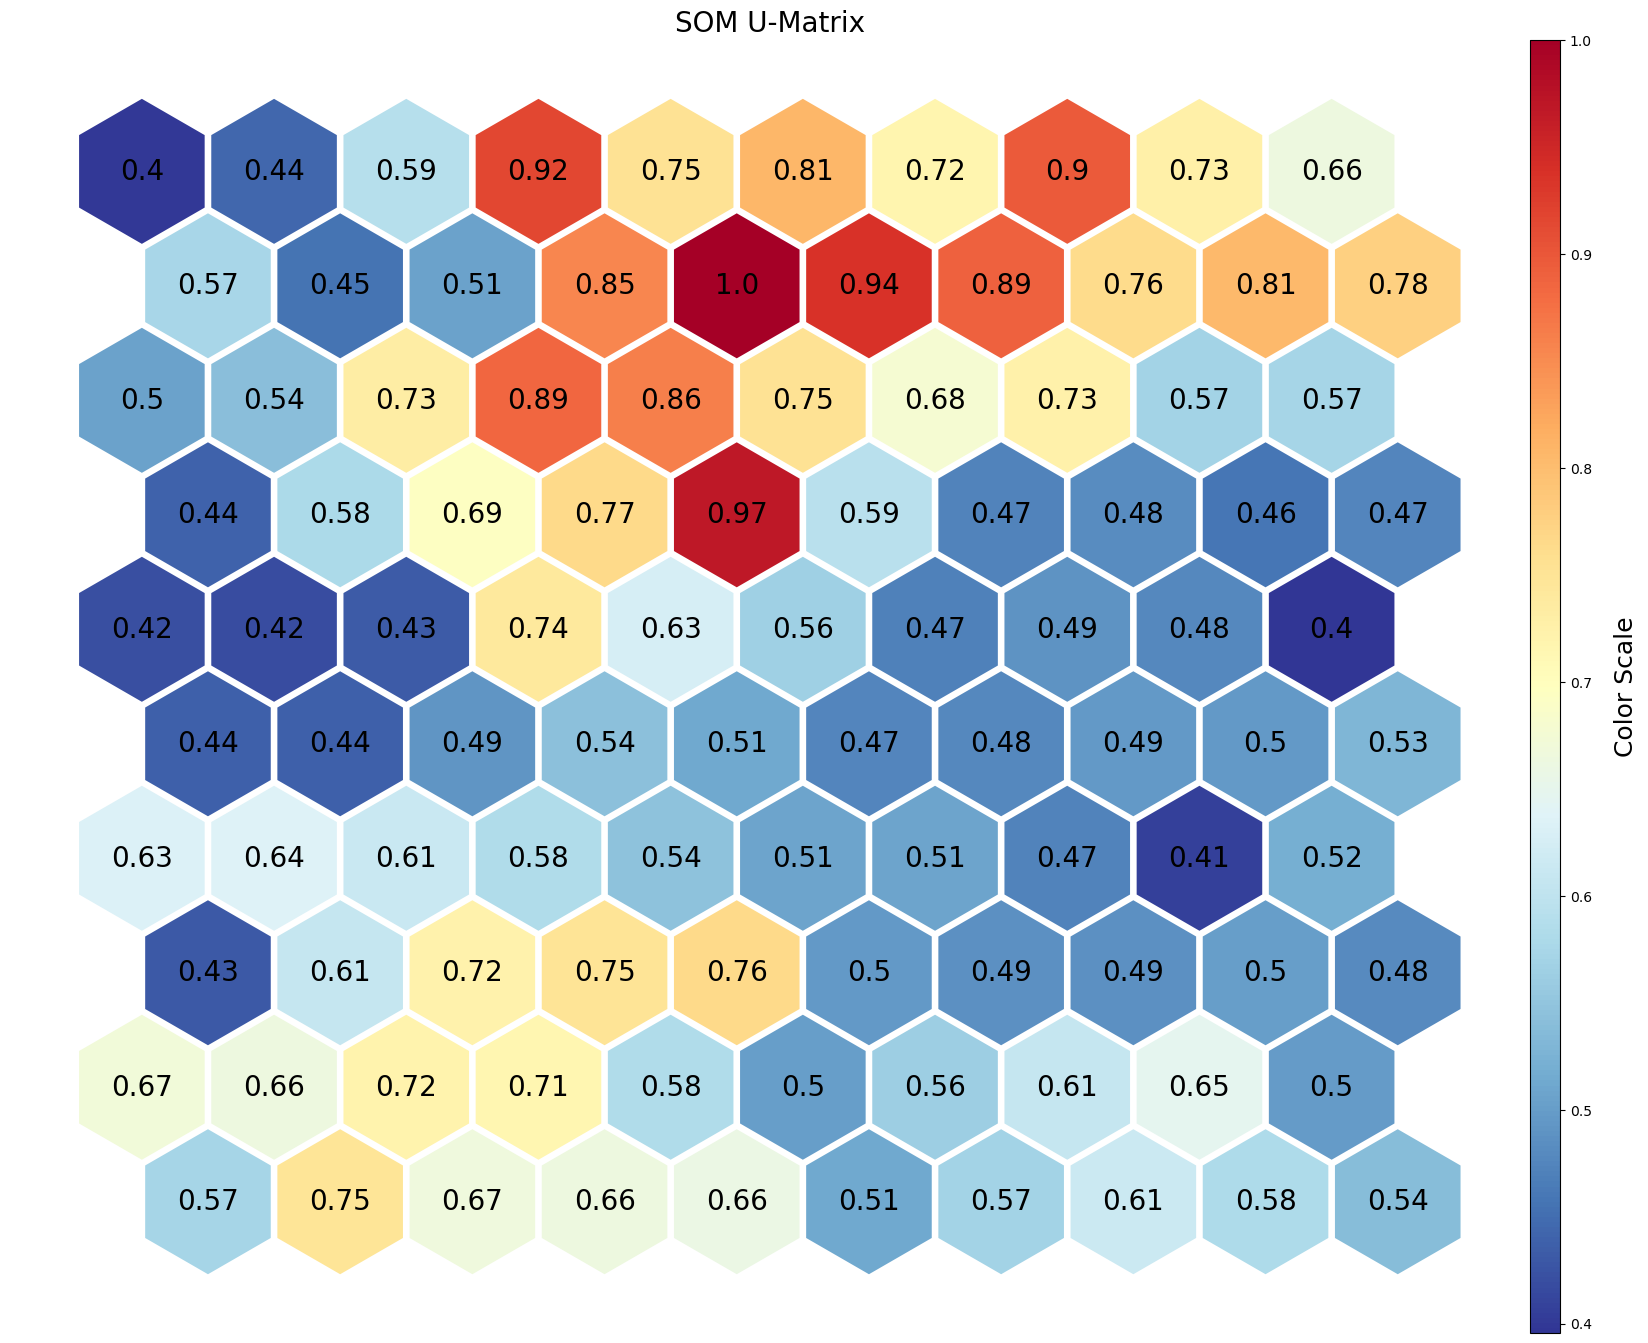

In [13]:
umatrix = sm.distance_map(scaling='mean')

fig = plot_som_hexagons(sm, umatrix, cmap=cm.RdYlBu_r, title="SOM U-Matrix")
plt.show()


In [14]:
## Flip and rotate to match plot
np.flip(np.round(umatrix,2), axis=1).T

array([[0.4 , 0.44, 0.59, 0.92, 0.75, 0.81, 0.72, 0.9 , 0.73, 0.66],
       [0.57, 0.45, 0.51, 0.85, 1.  , 0.94, 0.89, 0.76, 0.81, 0.78],
       [0.5 , 0.54, 0.73, 0.89, 0.86, 0.75, 0.68, 0.73, 0.57, 0.57],
       [0.44, 0.58, 0.69, 0.77, 0.97, 0.59, 0.47, 0.48, 0.46, 0.47],
       [0.42, 0.42, 0.43, 0.74, 0.63, 0.56, 0.47, 0.49, 0.48, 0.4 ],
       [0.44, 0.44, 0.49, 0.54, 0.51, 0.47, 0.48, 0.49, 0.5 , 0.53],
       [0.63, 0.64, 0.61, 0.58, 0.54, 0.51, 0.51, 0.47, 0.41, 0.52],
       [0.43, 0.61, 0.72, 0.75, 0.76, 0.5 , 0.49, 0.49, 0.5 , 0.48],
       [0.67, 0.66, 0.72, 0.71, 0.58, 0.5 , 0.56, 0.61, 0.65, 0.5 ],
       [0.57, 0.75, 0.67, 0.66, 0.66, 0.51, 0.57, 0.61, 0.58, 0.54]])

### Hit-map
Show the **frequency** of each Unit in the output map

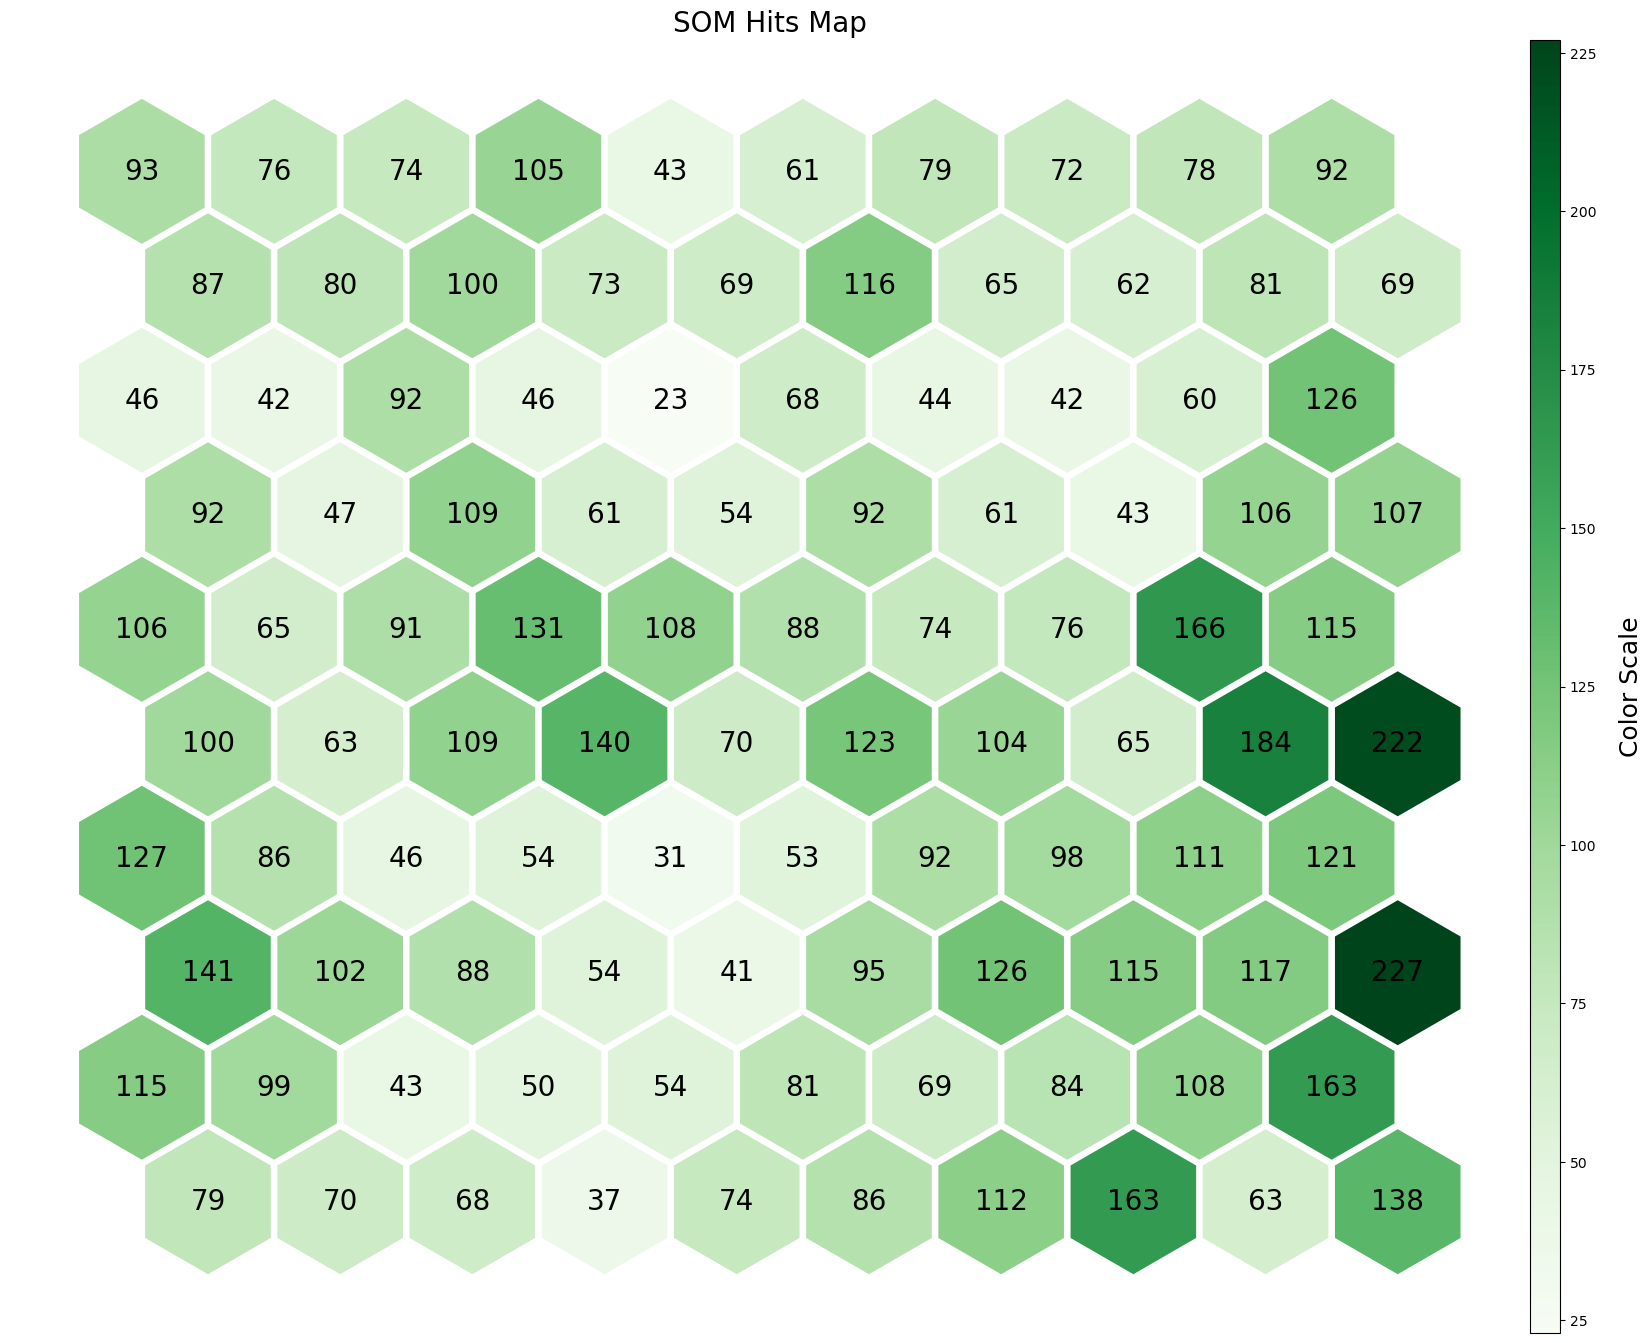

In [15]:
hitsmatrix = sm.activation_response(df[metric_features].values)

fig = plot_som_hexagons(sm, hitsmatrix, cmap=cm.Greens, title="SOM Hits Map")
plt.show()


In [16]:
## Values of HITS:
## Flip and rotate to match plot
np.flip(np.round(hitsmatrix,2), axis=1).T


array([[ 93.,  76.,  74., 105.,  43.,  61.,  79.,  72.,  78.,  92.],
       [ 87.,  80., 100.,  73.,  69., 116.,  65.,  62.,  81.,  69.],
       [ 46.,  42.,  92.,  46.,  23.,  68.,  44.,  42.,  60., 126.],
       [ 92.,  47., 109.,  61.,  54.,  92.,  61.,  43., 106., 107.],
       [106.,  65.,  91., 131., 108.,  88.,  74.,  76., 166., 115.],
       [100.,  63., 109., 140.,  70., 123., 104.,  65., 184., 222.],
       [127.,  86.,  46.,  54.,  31.,  53.,  92.,  98., 111., 121.],
       [141., 102.,  88.,  54.,  41.,  95., 126., 115., 117., 227.],
       [115.,  99.,  43.,  50.,  54.,  81.,  69.,  84., 108., 163.],
       [ 79.,  70.,  68.,  37.,  74.,  86., 112., 163.,  63., 138.]])

In [17]:
sm.quantization_error(df[metric_features].values)

1.328596731420893

## Clustering with SOMs: K-means SOM vs Emergent SOM
- In **k-means SOM**, the *number of units should be equal to the expected number of clusters*, and thus each cluster should be represented by a single unit. 
- In **emergent SOM**, a very *large number of units is used*. These very large SOM allow for very clear U-Matrices and are useful for detecting quite clearly the underlying structure of the data. This technique can be **used together with other clustering algorithms**.

**Exercise**
- Train a SOM with a 50x50 grid, random initialization, gaussian neighborhood function and hexagonal topology/lattice
- Set an unfolding phase and a fine tuning phase of 100 iterations

In [18]:
M=40
N=30
sm = MiniSom(M,N, # MxN map size
             len(metric_features), # Number of the elements of the vectors in input.
             learning_rate=.7, 
             activation_distance='euclidean',
             topology='hexagonal', 
             neighborhood_function='gaussian', 
             random_seed=42
             )

# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(df[metric_features].values) 

# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;
sm.train_batch(df[metric_features].values, 200000)


In [19]:
M=40
N=30
sm = MiniSom(M,N, # MxN map size
             len(metric_features), # Number of the elements of the vectors in input.
             learning_rate=.7, 
             activation_distance='euclidean',
             topology='hexagonal', 
             neighborhood_function='gaussian', 
             random_seed=42
             )


# Initializes the weights of the SOM picking random samples from data.
sm.random_weights_init(df[metric_features].values) 

print(np.round(sm.quantization_error(df[metric_features].values),4),"Starting QE")


# Trains the SOM using all the vectors in data sequentially
# minisom does not distinguish between unfolding and fine tuning phase;

sm.train_batch(df[metric_features].values, 500000)
print(np.round(sm.quantization_error(df[metric_features].values),4),"Ending QE")


0.9002 Starting QE
0.7641 Ending QE


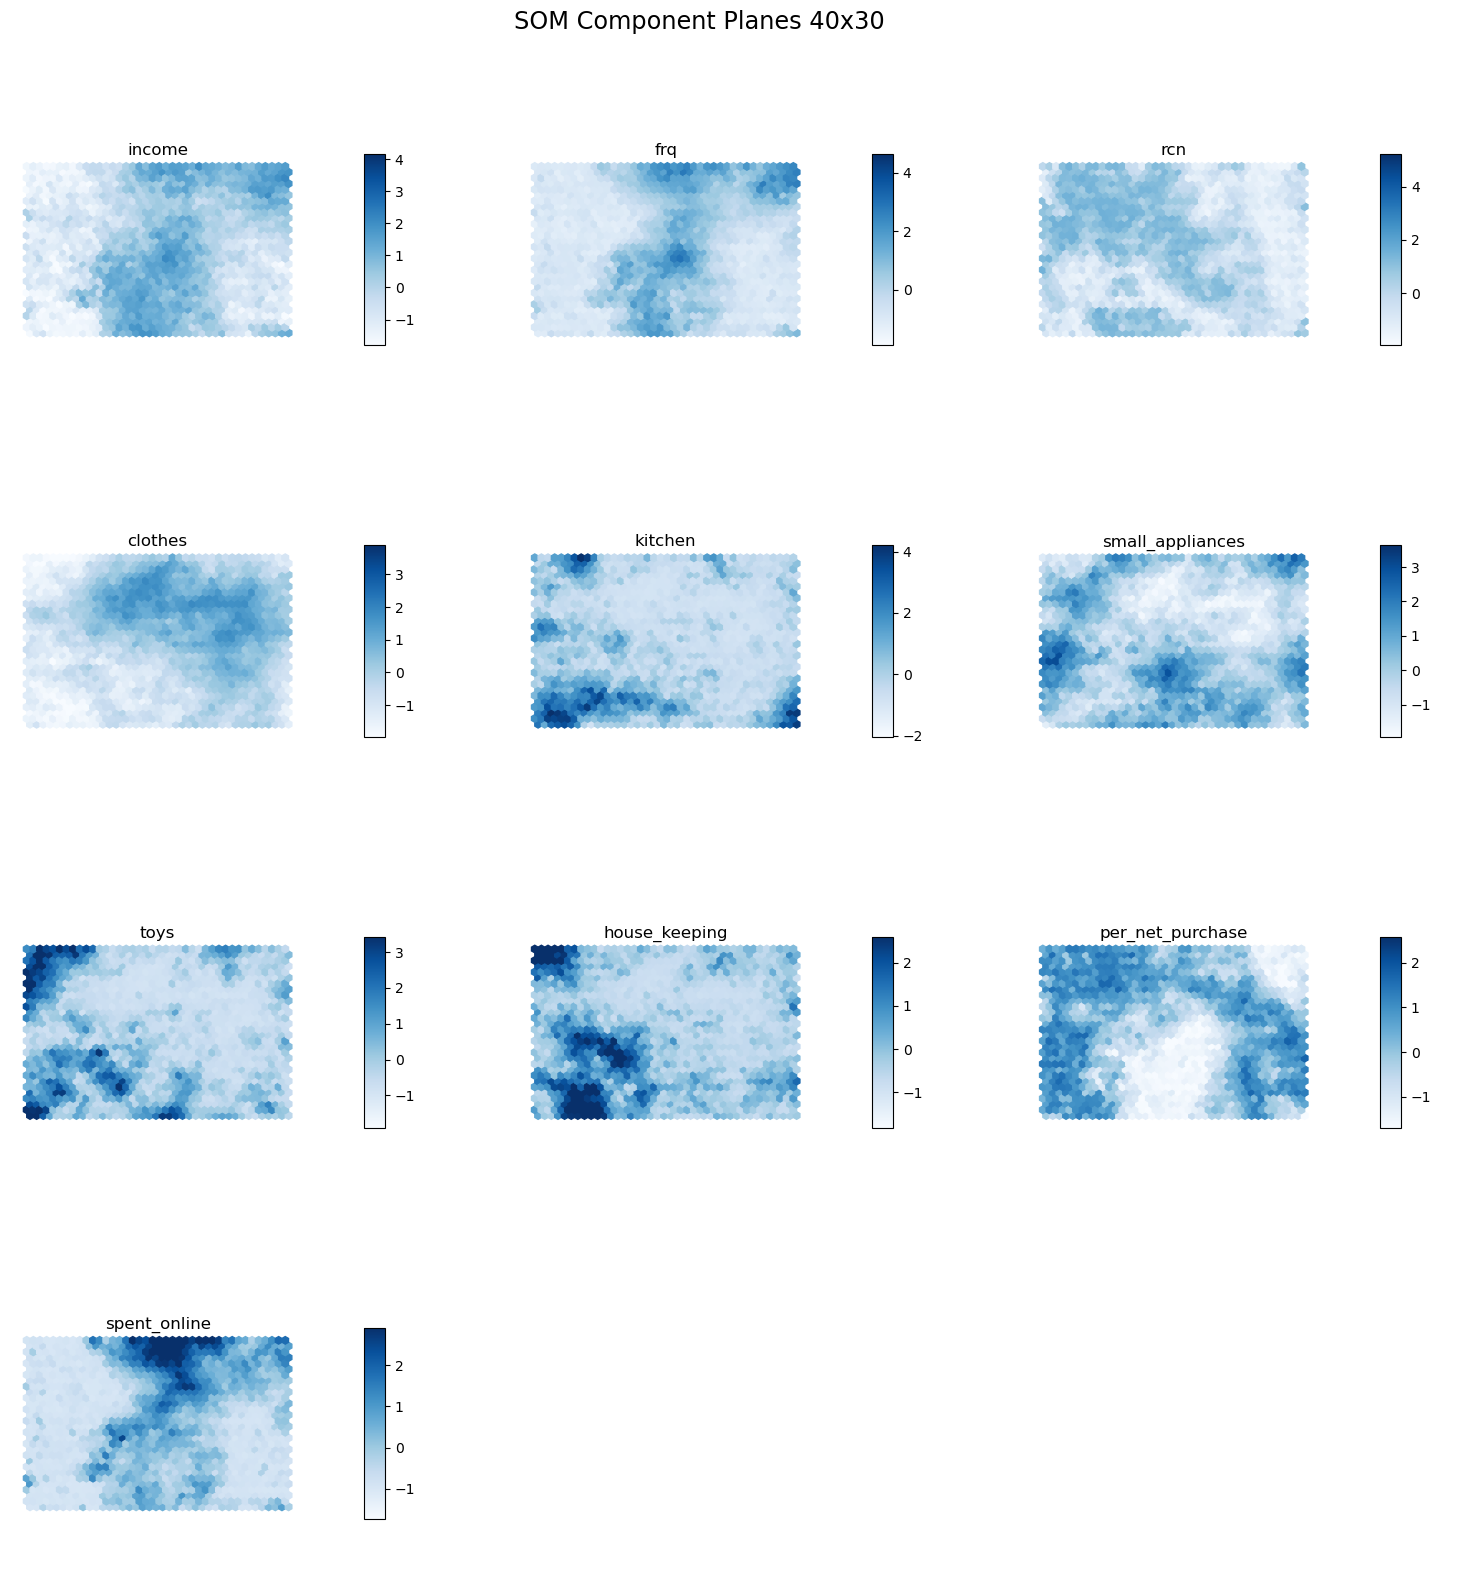

In [20]:
## Plot Component Planes 40x30
plot_component_planes(sm,
                      features=metric_features,
                      figsize=(15,15),
                      figrows=4,
                      title="SOM Component Planes {}x{}".format(M,N)
                     )




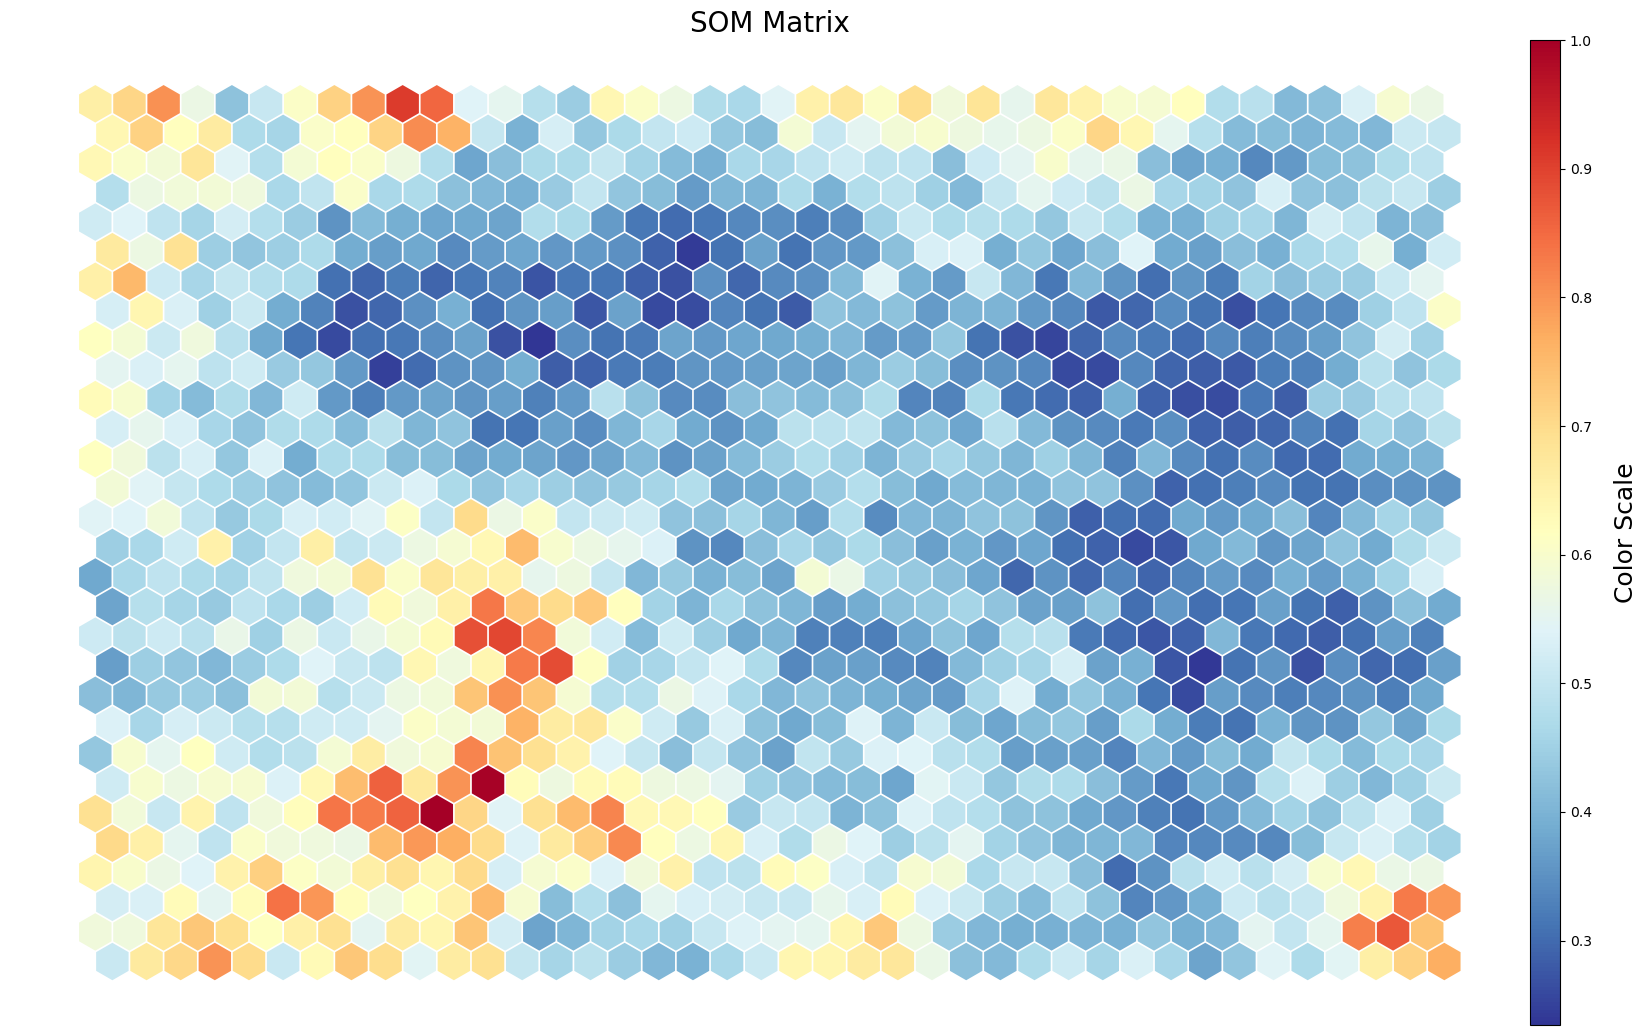

In [21]:
# U-matrix of the 40x30 grid
umatrix = sm.distance_map(scaling='mean')

fig = plot_som_hexagons(sm, umatrix, cmap=cm.RdYlBu_r, annotate=False)
plt.show()


In [22]:
umatrix.shape

(40, 30)

Now we can have a better idea of how the input space look like in terms of distances.

### K-Means on top of SOM units
- Define number of clusters to retain

In [23]:
# Exercise:
# Do the Inertia plot here (check last class' notebook)

In [24]:
weights = sm.get_weights().reshape((M*N),len(metric_features))
weights.shape

(1200, 10)

In [25]:
# Perform K-Means clustering on top of the MxN units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(weights)
nodeclus_labels

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [26]:
kmeans_matrix = nodeclus_labels.reshape((M,N))


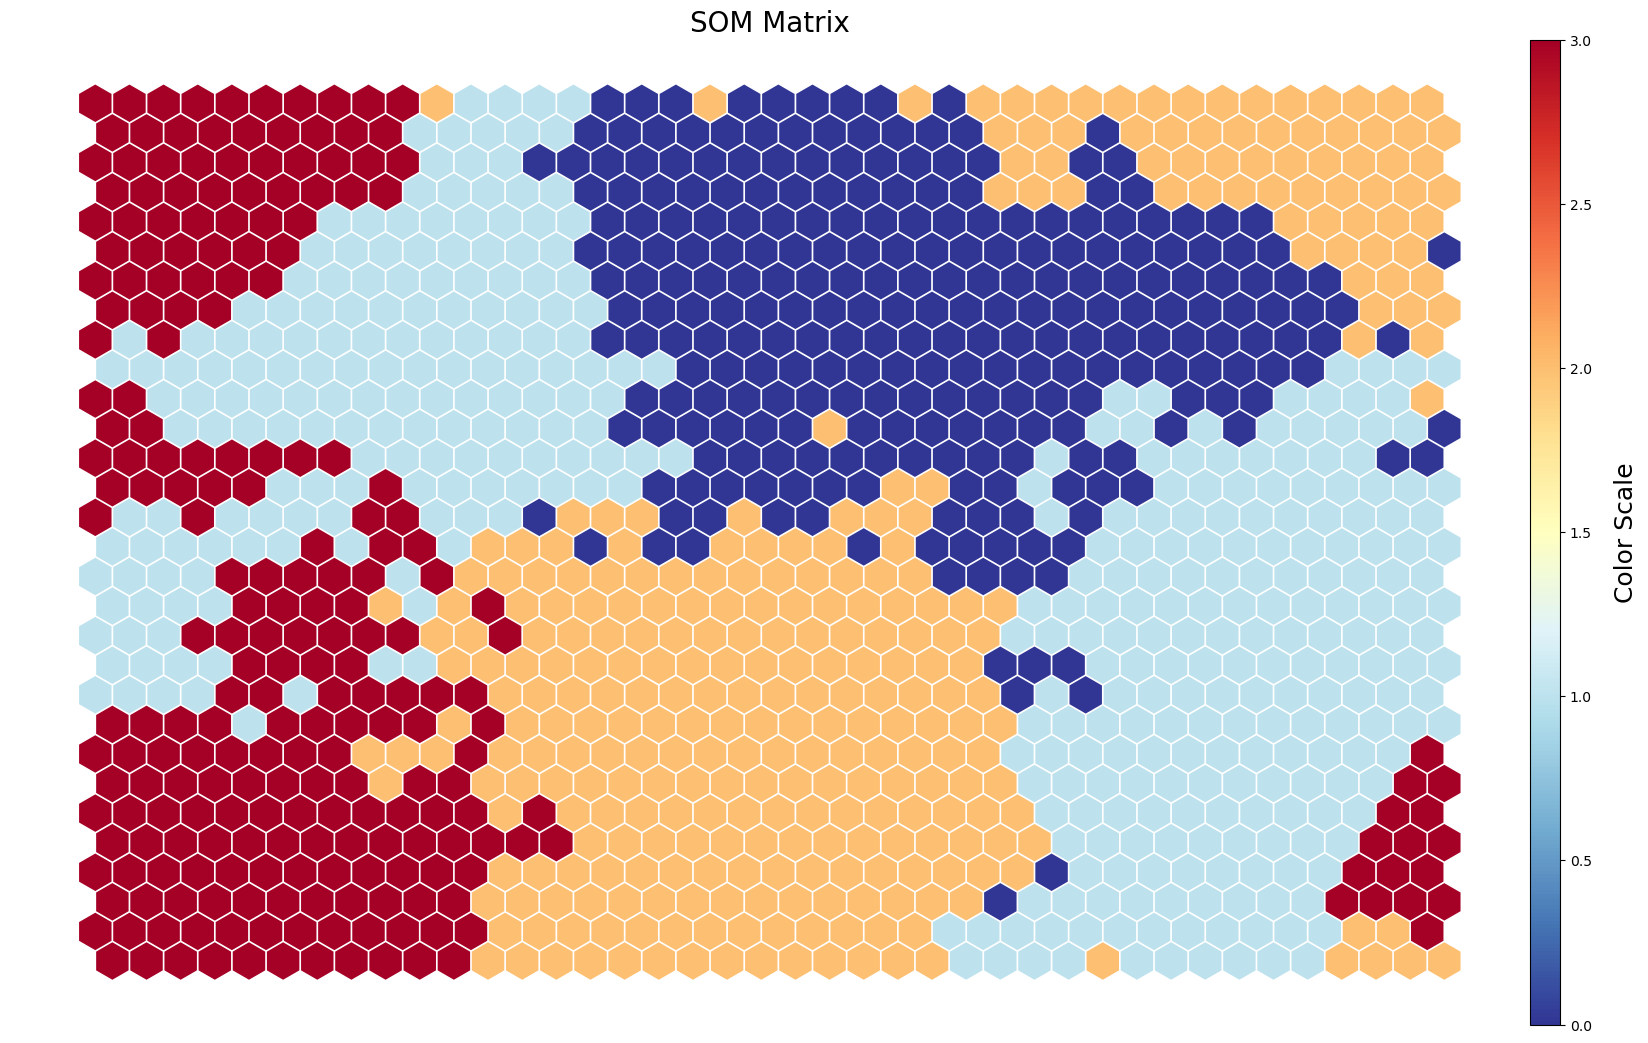

In [27]:
plot_som_hexagons(sm, kmeans_matrix, cmap=cm.RdYlBu_r, annotate=False)
plt.show()

### Hierarchical Clustering on top of SOM units
- Define best linkage method
- Define number of clusters to retain

In [28]:
# Exercise:
# Do the R² plot here and the Dendrogram (check last class' notebook)

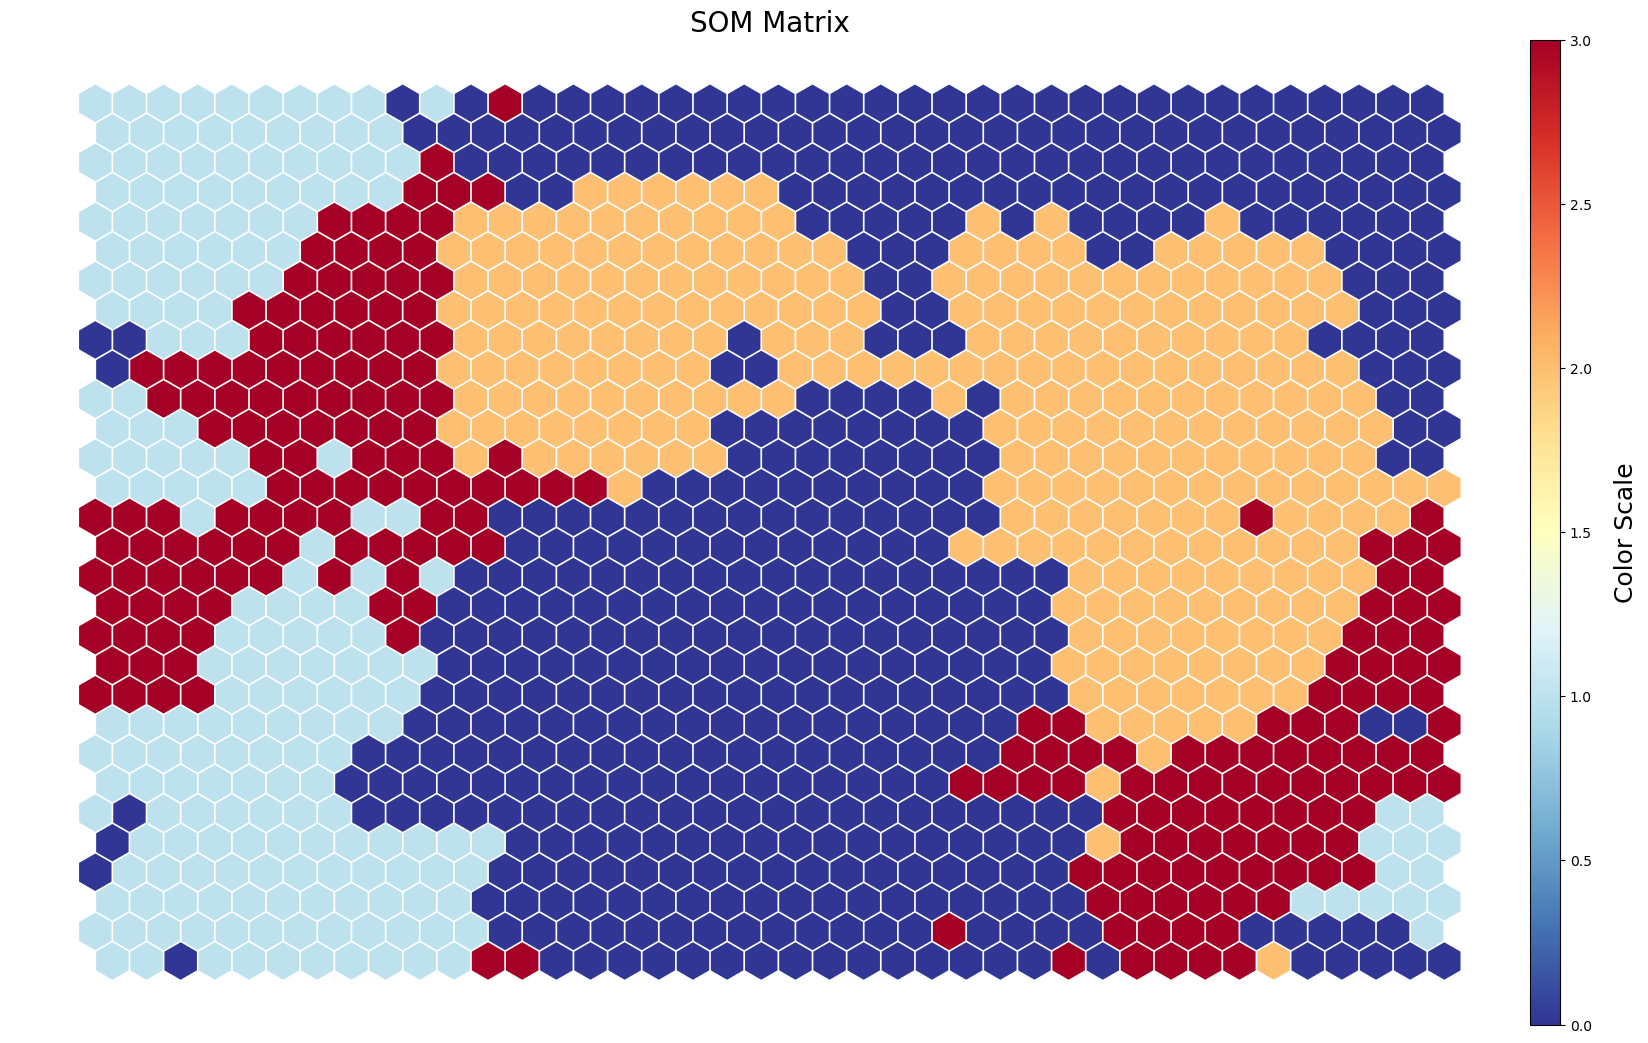

In [29]:
# Perform Hierarchical clustering on top of the MxN units 

hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(weights)
hclust_matrix = nodeclus_labels.reshape((M,N))

plot_som_hexagons(sm, hclust_matrix, cmap=cm.RdYlBu_r, annotate=False)
plt.show()

### Final SOM Clustering solution

In [30]:
# Check the nodes and and respective clusters
nodes = weights

df_nodes = pd.DataFrame(nodes, columns=metric_features)
df_nodes['label'] = nodeclus_labels
df_nodes

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,label
0,-1.696490,-1.145135,-0.708889,-1.349775,2.584776,-1.356228,3.686514,0.505940,-0.101415,-0.941844,1
1,-1.496986,-0.873904,0.161250,-1.577515,1.947476,-0.637097,3.623287,0.741574,0.532281,-0.861326,1
2,-1.511042,-0.970667,-0.435128,-1.830941,2.343035,0.438803,2.843764,-0.044306,0.683382,-0.889895,1
3,0.005695,-0.339907,-0.661387,-1.418656,1.621842,0.994901,1.596761,-0.336519,0.312324,-0.044352,0
4,-0.035992,0.386947,-1.114354,-1.136171,1.739491,0.220767,2.178338,-0.564631,0.740640,1.010910,0
...,...,...,...,...,...,...,...,...,...,...,...
1195,1.108537,1.571323,-0.181680,0.119340,-0.106753,0.273648,-0.532907,-0.205005,-0.903598,1.413645,0
1196,1.892602,2.655436,-0.585260,0.235600,-0.522044,0.574541,-0.795651,-0.440967,-1.313723,1.509144,0
1197,2.149648,2.440824,-0.689348,-0.685019,0.707618,0.454416,0.067785,0.553174,-1.462442,1.074997,0
1198,1.860590,2.641886,0.135452,-1.207999,0.560049,1.439470,0.441545,0.328772,-1.522293,0.896283,0


In [31]:
## This gets BMU coordinates, e.g. (4,4) for each data point
bmu_index = np.array([sm.winner(x) for x in df[metric_features].values])

print(bmu_index.shape)

bmu_index

(8817, 2)


array([[18, 11],
       [33, 28],
       [10,  3],
       ...,
       [34, 12],
       [13, 14],
       [19, 28]])

In [32]:

## This gets the cluster label from hclust_matrix, i.e.
## if data row 0 has BMU at (37, 28) 
## it will get the label associated to node (37,28) using label associated to hclust_matrix[37,28] above

som_final_labels = [hclust_matrix[i[0]][i[1]] for i in bmu_index]


In [33]:
df_final = pd.concat([
                df,
                pd.Series(som_final_labels, name='label', index=df.index)
            ], axis=1
            )

df_final

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x_gender_M,x_dependents_1.0,x_description_Kind of OK,x_description_Meh...,x_description_OK nice!,x_description_Take my money!!,PC0,PC1,PC2,label
0,0.743162,1.191605,0.457819,-0.617023,-0.243065,1.216847,0.495837,-0.499274,-1.257560,0.522055,...,1.0,0.0,0.0,0.0,0.0,1.0,0.896356,1.937697,-1.120781,0
1,1.559488,1.100011,-1.535723,0.166160,-0.790228,0.740464,-0.374374,-0.631907,-1.798649,-0.237578,...,0.0,0.0,0.0,0.0,0.0,1.0,1.981092,1.421498,-0.785625,0
2,-1.548542,-0.823463,0.557496,-0.834573,1.672006,-0.371096,-0.809480,2.286023,0.906799,-0.904191,...,1.0,1.0,1.0,0.0,0.0,0.0,-2.813108,-0.381440,0.780867,1
3,0.845528,0.550447,-1.402820,0.383710,0.440889,-0.768082,-0.084304,-0.234007,-0.391816,0.785568,...,0.0,1.0,0.0,0.0,1.0,0.0,1.247013,0.514177,1.302203,0
4,0.782435,1.008417,-0.871209,0.340200,-0.243065,-0.053508,-0.374374,-0.366640,-0.445925,1.237135,...,0.0,1.0,0.0,0.0,0.0,1.0,1.781920,0.704805,0.443376,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812,0.618993,0.458853,-1.701851,0.209670,0.167308,-0.132905,0.205767,-0.764540,0.257492,1.275517,...,1.0,1.0,1.0,0.0,0.0,0.0,1.162525,0.372854,0.982963,0
8813,0.874744,0.733635,-1.701851,0.731791,-0.243065,-0.609288,-0.519409,-0.366640,0.690363,1.865248,...,0.0,1.0,0.0,0.0,0.0,1.0,2.003026,-0.083121,1.428619,0
8814,-0.455617,-0.731869,-1.535723,0.079139,-0.106274,-0.053508,0.060732,-0.101374,1.556107,-0.801266,...,1.0,1.0,0.0,1.0,0.0,0.0,-1.002171,-1.301747,0.423851,2
8815,-0.596155,0.825229,0.657173,-0.442982,0.577680,0.581670,-0.809480,0.561792,-0.608252,0.801051,...,1.0,0.0,0.0,0.0,0.0,1.0,0.130573,0.959962,-0.332242,0


In [34]:
# Characterizing the final clusters
df_final.groupby('label').mean()

,income,frq,rcn,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase,spent_online,...,x_status_Widow,x_gender_M,x_dependents_1.0,x_description_Kind of OK,x_description_Meh...,x_description_OK nice!,x_description_Take my money!!,PC0,PC1,PC2
label,,,,,,,,,,,,,,,,,,,,,
0,0.904055,0.890173,-0.076905,-0.191074,0.050138,0.283278,0.072167,-0.003086,-0.858614,0.632098,...,0.097469,0.645621,0.434972,0.114926,0.119581,0.442537,0.322083,1.008903,1.361511,-0.042831
1,-1.259334,-0.890931,0.068224,-1.354971,1.325406,0.174875,1.348243,1.321521,0.763770,-0.826123,...,0.013209,0.665113,0.801088,0.324009,0.344211,0.320901,0.000000,-3.180207,0.440878,0.670531
2,-0.117063,-0.274143,-0.074627,1.091371,-0.660052,-0.865258,-0.670465,-0.634230,0.391157,-0.017194,...,0.027799,0.640899,0.922315,0.279513,0.282178,0.354151,0.080350,0.931902,-1.587829,0.228575
3,-0.803726,-0.813223,0.253912,-0.317227,-0.098721,0.731750,-0.151730,-0.016840,0.641381,-0.725391,...,0.006817,0.624404,0.936605,0.345603,0.304022,0.341513,0.000000,-1.241887,-0.734345,-0.897071


## Analysing the appropriateness of our solution
### R²

In [35]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_final[metric_features])  # get total sum of squares
ssw_labels = df_final[metric_features.to_list() + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.42339142468079666

### Quantization error:
The quantization error is given by the average distance between a unit and the data points mapped to it i.e. all the input data points that share it as BMU.

$$q_e = \frac{\sum_{i=0}^{N_e}||x_i - w_e||}{N_e}$$

$$Q = \frac{\sum_{e=0}^Eq_e}{E}$$
, where:

$Q$ is the overall quantization error of SOM,

$q_e$ is the quantization error for unit $e$,

$x_i$ is a data point/ observation,

$w_e$ is the unit $e$ representation in the input space,

$N_e$ is number of data points mapped to unit $e$,

$E$ is the number of units in the SOM grid

In [36]:
sm.quantization_error(df[metric_features].values)

0.7641199215344788